# Support Vector Regression
SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

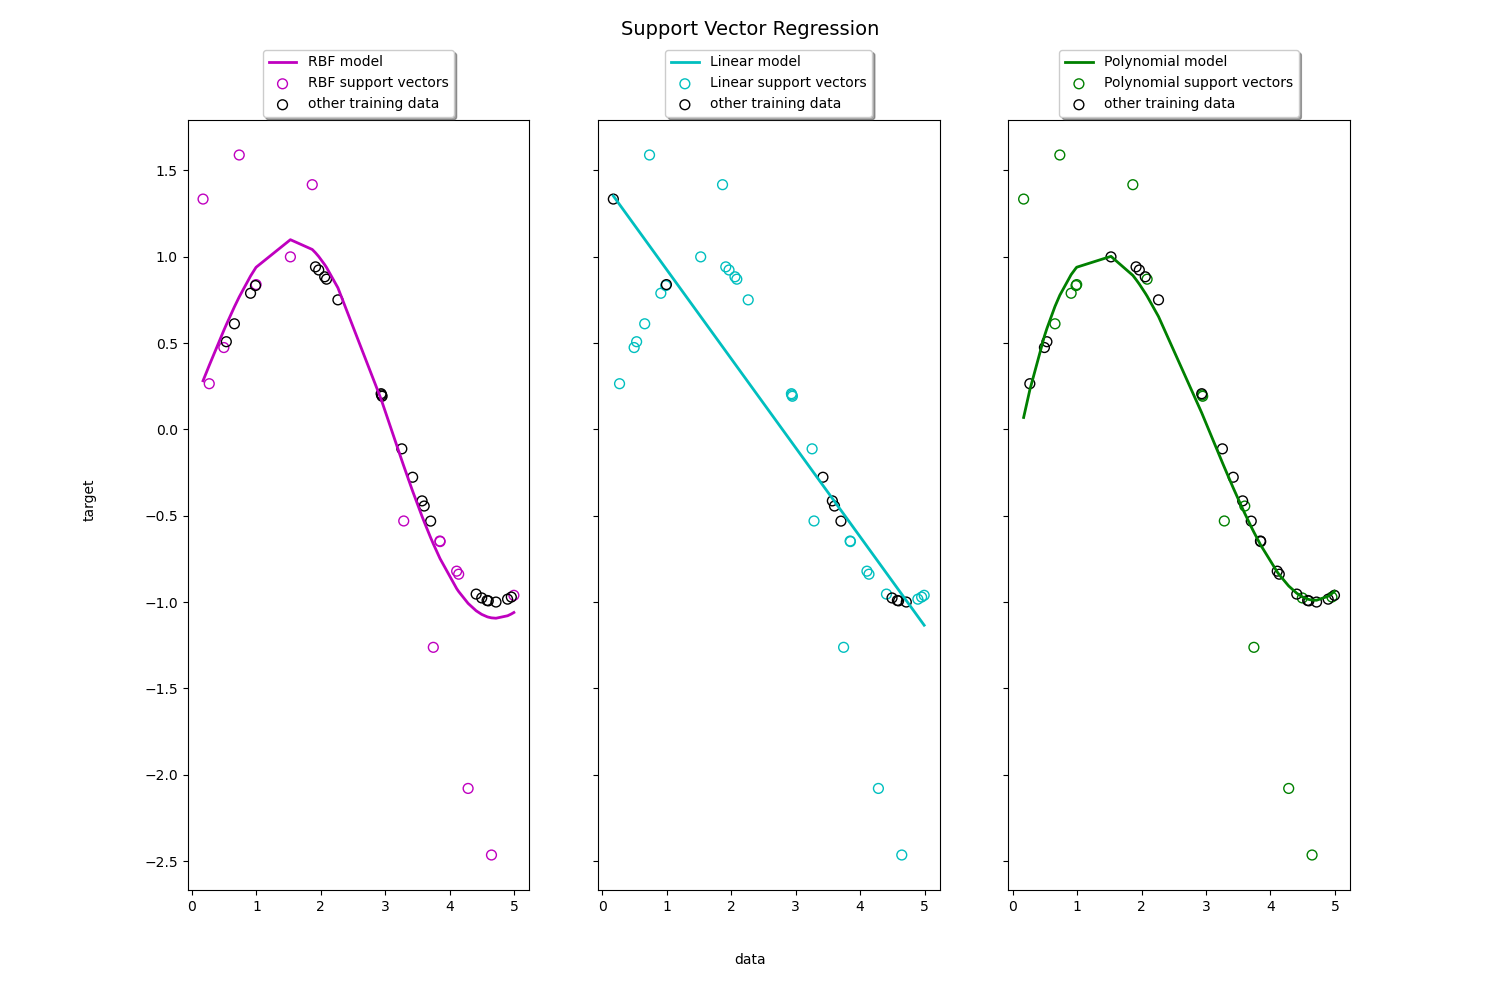

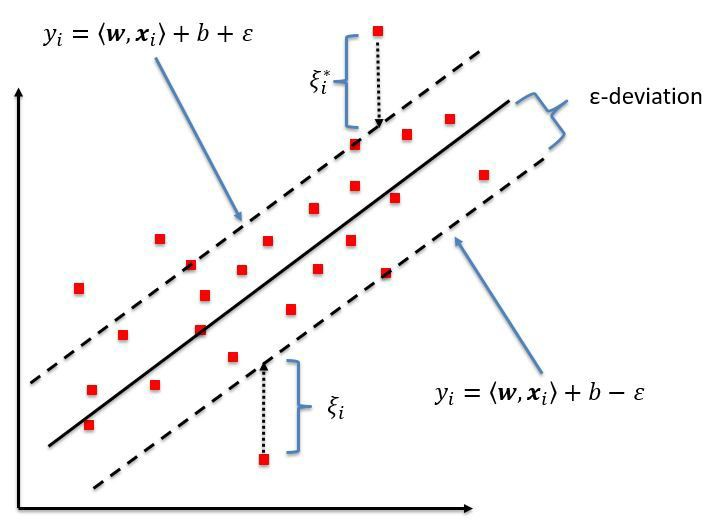

Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.

Assuming that the equation of the hyperplane is as follows:

***Y = wx+b (equation of hyperplane)***

Then the equations of decision boundary become:

***wx+b= +a***

***wx+b= -a***

Thus, any hyperplane that satisfies our SVR should satisfy:

***-a < Y- wx+b < +a***



## Getting Started With Support Vector Regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## DataFraming

In [23]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [24]:
x = dataset.iloc[:, 1:2].values.astype(float)
y = dataset.iloc[:, 2:3].values.astype(float)

print(x)
print(y)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


## Feature Scaling

In [25]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [26]:
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Visualizing

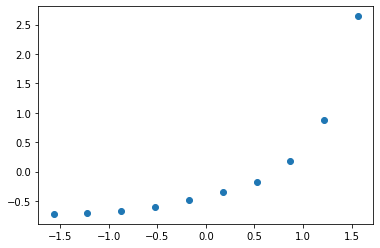

In [27]:
plt.scatter(x, y)
plt.show()

## Training

In [28]:
rbf_model = SVR(kernel='rbf')
rbf_model.fit(x, y)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Visualization

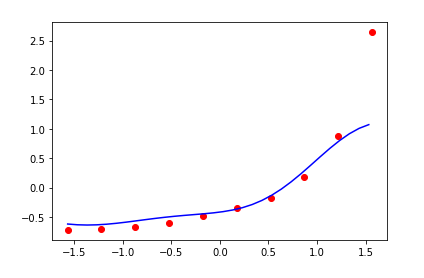

In [29]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x, y, color='red')
plt.plot(x_grid, rbf_model.predict(x_grid), color = "blue")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))", color='white')
plt.xlabel("Position level", color='white')
plt.ylabel("Salary", color='white')
plt.show()

## Prediction

In [30]:
y_pred = model.predict(sc_x.transform(np.array([[10]])))
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y_pred

array([[787655.21428438]])

## Comparing with SVR Polynomial Model

In [31]:
poly_model = SVR(kernel='poly')
poly_model.fit(x, y)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

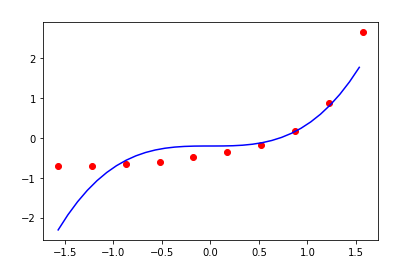

In [32]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x, y, color='red')
plt.plot(x_grid, poly_model.predict(x_grid), color = "blue")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))", color='white')
plt.xlabel("Position level", color='white')
plt.ylabel("Salary", color='white')
plt.show()

## Comparing with Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)

PolynomialFeatures(degree=3)

In [34]:
from sklearn.linear_model import LinearRegression
polymodel = LinearRegression()
polymodel.fit(x_poly, y)

LinearRegression()

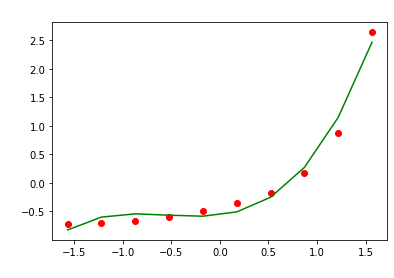

In [35]:
plt.scatter(x, y, color='red')
plt.plot(x, polymodel.predict(x_poly), color='green')
plt.title('Polynomial Regression', color='white')
plt.xlabel('Position Level', color='white')
plt.ylabel('Salary', color='white')
plt.show()

## Split

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
rbf_model = SVR(kernel='rbf')
rbf_model.fit(x_train, y_train)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

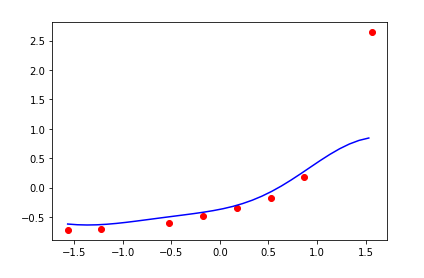

In [38]:
x_grid = np.arange(min(x_train), max(x_train), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x_train, y_train, color='red')
plt.plot(x_grid, rbf_model.predict(x_grid), color = "blue")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))", color='white')
plt.xlabel("Position level", color='white')
plt.ylabel("Salary", color='white')
plt.show()

In [44]:
y_pred = rbf_model.predict(x_test)
print('y_test:\t', y_test)
print('y_pred:\t', y_pred)

y_test:	 [[-0.66722767]
 [ 0.88200808]]
y_pred:	 [-0.57211622  0.64741263]


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9466019139843265